In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

##  Part 1 - Prepare SQLAlchemy

In [35]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import *
from sqlalchemy import desc
import datetime
from sqlalchemy import Column, Integer, DateTime

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [15]:
 # Preview the data model in Db Browser or a similar tool
inspector = inspect(engine)
for table_name in inspector.get_table_names(): 
    print( table_name) 
# (do this to get a sense as to how the database is structured)

measurement
station


In [14]:
for table_name in inspector.get_table_names(): 
    print( table_name)
    for column in inspector.get_columns(table_name):
        print( "-    "  + column['name'] )
# (do this to get a sense as to how the database is structured)

measurement
-    id
-    station
-    date
-    prcp
-    tobs
station
-    id
-    station
-    name
-    latitude
-    longitude
-    elevation


## Part 2 - Exploratory Climate Analysis

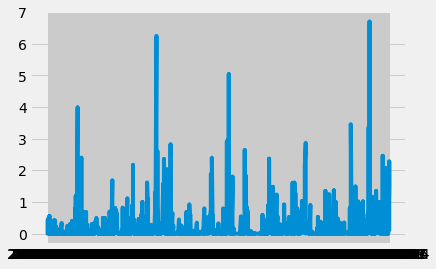

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database 
# Perform a query to retrieve the data and precipitation scores 
df_measure = pd.read_sql("""
SELECT * FROM Measurement WHERE date > (
    SELECT DATE(MAX(date), '-12 month') 
    FROM Measurement
    ) AND prcp IS NOT NULL
""", conn)   
# Save the query results as a Pandas DataFrame and set the index to the date column
df_measure.set_index('date', inplace=True)
# Sort the dataframe by date
df_measure.sort_values(by='date',inplace=True, ascending=False ) 
df_measure.head()
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df_measure.index.values, df_measure['prcp'])
plt.show()

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_measure.describe()

,id,prcp,tobs
count,2015.000000,2015.000000,2015.000000
mean,10177.465012,0.176462,74.484367
std,5780.623728,0.460288,4.629750
min,2365.000000,0.000000,58.000000
25%,5237.500000,0.000000,71.000000
50%,8954.000000,0.020000,75.000000
75%,14782.500000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


In [83]:
#  Design a query to show how many stations are available in this dataset?
df_stations= pd.read_sql("""
    SELECT COUNT ( DISTINCT station ) station_cnt FROM Measurement
""", conn)  
print(df_stations.loc[0, 'station_cnt'])

9


In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?
df_measure['station'].value_counts()
# List the stations and the counts in descending order.

USC00519397    358
USC00519281    351
USC00513117    342
USC00516128    327
USC00519523    313
USC00514830    264
USC00517948     60
Name: station, dtype: int64

In [95]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = df_measure['station'].value_counts().index.values[0]
df_measure.loc[df_measure['station']==most_active].describe()['tobs']

count    358.000000
mean      75.181564
std        4.970839
min       60.000000
25%       72.000000
50%       77.000000
75%       79.000000
max       87.000000
Name: tobs, dtype: float64

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [105]:
import requests
import json
# response = requests.get('http://127.0.0.1:5000/api/v1.0/precipitation')
# result = response.json()
# print (json.dumps(result, indent=2, sort_keys=True))

## Part 3 - Data Analysis Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    # your code here
    
    return # your code here

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    # your code here
    
    return # your code here
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
 # Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`